# PHQ-9 Mock Data Generation
## Creating synthetic depression screening data for model development

This notebook generates mock PHQ-9 (Patient Health Questionnaire-9) data that mimics real student responses for mental health screening.

### Understanding PHQ-9

**PHQ-9 Questions** (0-3 scale for each):
1. Little interest or pleasure in doing things
2. Feeling down, depressed, or hopeless
3. Trouble falling/staying asleep, or sleeping too much
4. Feeling tired or having little energy
5. Poor appetite or overeating
6. Feeling bad about yourself - or that you are a failure
7. Trouble concentrating on things
8. Moving/speaking so slowly/fast that others noticed
9. Thoughts that you would be better off dead

**Scoring & Severity Levels:**
- 0-4: Minimal depression
- 5-9: Mild depression  
- 10-14: Moderate depression
- 15-19: Moderately severe depression
- 20-27: Severe depression

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility (so we get the same results every time)
np.random.seed(42)
random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### Defining PHQ-9 Questions

In [2]:
# List of all PHQ-9 questions
phq9_questions = [
    "Little interest or pleasure in doing things",
    "Feeling down, depressed, or hopeless",
    "Trouble falling/staying asleep, or sleeping too much",
    "Feeling tired or having little energy",
    "Poor appetite or overeating",
    "Feeling bad about yourself - or that you are a failure",
    "Trouble concentrating on things",
    "Moving/speaking so slowly/fast that others noticed",
    "Thoughts that you would be better off dead"
]

print("PHQ-9 Questions:")
for i, question in enumerate(phq9_questions, 1):
    print(f"{i}. {question}")

PHQ-9 Questions:
1. Little interest or pleasure in doing things
2. Feeling down, depressed, or hopeless
3. Trouble falling/staying asleep, or sleeping too much
4. Feeling tired or having little energy
5. Poor appetite or overeating
6. Feeling bad about yourself - or that you are a failure
7. Trouble concentrating on things
8. Moving/speaking so slowly/fast that others noticed
9. Thoughts that you would be better off dead


### Generating Mock Data

In [3]:
def generate_phq9_data(num_samples=1000):
    """
    Generate synthetic PHQ-9 data with realistic patterns
    """
    data = []
    
    for i in range(num_samples):
        # Generate a random user ID
        user_id = f"user_{i:04d}"
        
        # Generate a timestamp within the last year
        days_ago = random.randint(1, 365)
        timestamp = datetime.now() - timedelta(days=days_ago)
        
        # Generate answers (0-3 for each question)
        answers = []
        
        # Create realistic patterns based on severity
        base_severity = random.choice(['minimal', 'mild', 'moderate', 'severe'])
        
        if base_severity == 'minimal':
            # Mostly 0s and 1s (minimal depression)
            answers = [random.choices([0, 1], weights=[0.7, 0.3])[0] for _ in range(9)]
        elif base_severity == 'mild':
            # Mostly 1s and 2s (mild depression)
            answers = [random.choices([1, 2], weights=[0.6, 0.4])[0] for _ in range(9)]
        elif base_severity == 'moderate':
            # Mostly 2s with some 3s (moderate depression)
            answers = [random.choices([2, 3], weights=[0.7, 0.3])[0] for _ in range(9)]
        else:  # severe
            # Mostly 3s (severe depression)
            answers = [random.choices([2, 3], weights=[0.3, 0.7])[0] for _ in range(9)]
        
        # Add some random noise to make it more realistic
        answers = [min(3, max(0, answer + random.randint(-1, 1))) for answer in answers]
        
        # Calculate total score (sum of all answers)
        total_score = sum(answers)
        
        # Determine severity label based on total score
        if total_score <= 4:
            severity = "Minimal"
        elif total_score <= 9:
            severity = "Mild"
        elif total_score <= 14:
            severity = "Moderate"
        elif total_score <= 19:
            severity = "Moderately Severe"
        else:
            severity = "Severe"
        
        # Create a dictionary for this sample
        sample = {
            'user_id': user_id,
            'timestamp': timestamp,
            'total_score': total_score,
            'severity': severity
        }
        
        # Add individual question answers (q1, q2, ..., q9)
        for j, answer in enumerate(answers):
            sample[f'q{j+1}'] = answer
        
        data.append(sample)
    
    return pd.DataFrame(data)

# Generate 1000 samples
df_phq9 = generate_phq9_data(1000)
print(f"✅ Generated {len(df_phq9)} mock PHQ-9 samples")
df_phq9.head()

✅ Generated 1000 mock PHQ-9 samples


,user_id,timestamp,total_score,severity,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,user_0000,2024-09-28 08:57:01.918764,7,Mild,0,0,1,2,0,2,0,1,1
1,user_0001,2024-08-27 08:57:01.919233,22,Severe,2,2,2,2,2,3,3,3,3
2,user_0002,2025-07-30 08:57:01.919275,22,Severe,2,3,2,3,2,2,2,3,3
3,user_0003,2025-01-01 08:57:01.919307,21,Severe,2,2,2,3,3,3,1,3,2
4,user_0004,2025-07-24 08:57:01.919339,14,Moderate,3,2,0,1,1,0,3,2,2


### Data Exploration

In [4]:
print("📊 Data Overview:")
print(f"Dataset shape: {df_phq9.shape}")
print("\n📈 Severity Distribution:")
print(df_phq9['severity'].value_counts())

print("\n🔢 Summary Statistics:")
print(df_phq9['total_score'].describe())

📊 Data Overview:
Dataset shape: (1000, 13)

📈 Severity Distribution:
Severe               385
Moderately Severe    192
Mild                 161
Moderate             156
Minimal              106
Name: severity, dtype: int64

🔢 Summary Statistics:
count    1000.000000
mean       15.135000
std         7.144496
min         1.000000
25%         9.000000
50%        17.000000
75%        21.000000
max        26.000000
Name: total_score, dtype: float64


### Visualizing the data

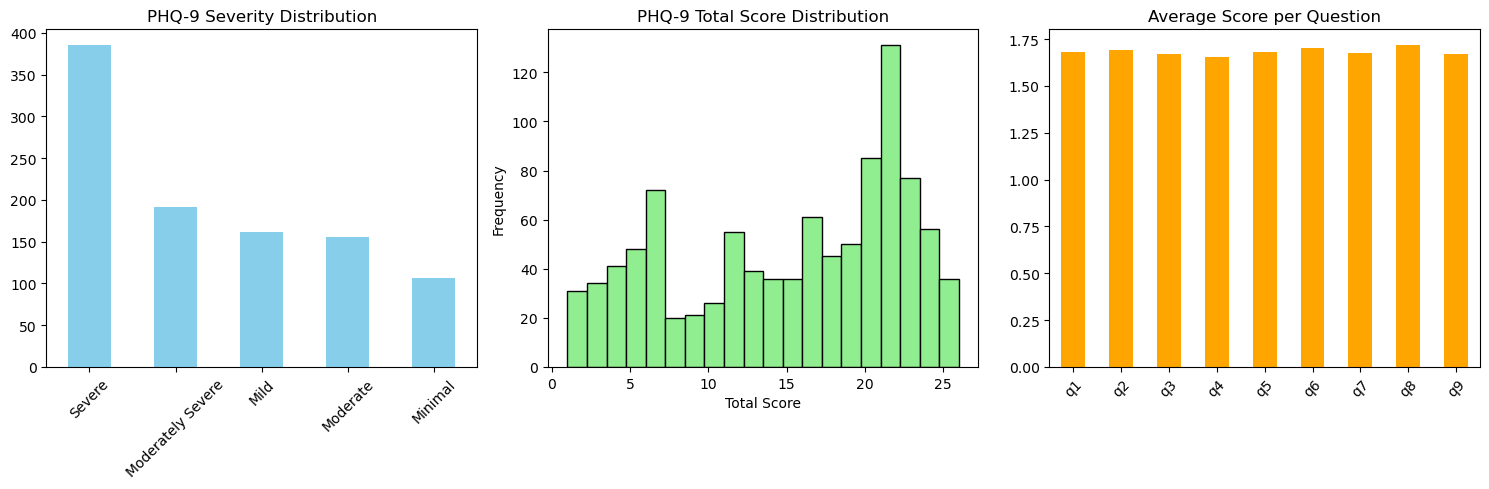

In [5]:
plt.figure(figsize=(15, 5))

# Plot 1: Severity distribution
plt.subplot(1, 3, 1)
df_phq9['severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('PHQ-9 Severity Distribution')
plt.xticks(rotation=45)

# Plot 2: Total score distribution
plt.subplot(1, 3, 2)
plt.hist(df_phq9['total_score'], bins=20, color='lightgreen', edgecolor='black')
plt.title('PHQ-9 Total Score Distribution')
plt.xlabel('Total Score')
plt.ylabel('Frequency')

# Plot 3: Average score per question
plt.subplot(1, 3, 3)
question_columns = [f'q{i}' for i in range(1, 10)]
avg_scores = df_phq9[question_columns].mean()
avg_scores.plot(kind='bar', color='orange')
plt.title('Average Score per Question')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Saving the Data


In [6]:
# Create data directories if they don't exist
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

# Save raw data
raw_filepath = 'data/raw/phq9_mock_data.csv'
df_phq9.to_csv(raw_filepath, index=False)
print(f"💾 Raw data saved to: {raw_filepath}")

# Create a processed version with encoded labels (for machine learning)
df_processed = df_phq9.copy()

# Encode severity labels to numbers (Minimal=0, Mild=1, etc.)
le = LabelEncoder()
df_processed['severity_encoded'] = le.fit_transform(df_processed['severity'])

# Save processed data
processed_filepath = 'data/processed/phq9_processed_data.csv'
df_processed.to_csv(processed_filepath, index=False)
print(f"💾 Processed data saved to: {processed_filepath}")

print("\n🎉 Mock data generation complete! Ready for EDA and modeling.")

💾 Raw data saved to: data/raw/phq9_mock_data.csv
💾 Processed data saved to: data/processed/phq9_processed_data.csv

🎉 Mock data generation complete! Ready for EDA and modeling.
